In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 資料探索

In [2]:
#跨國零售商資料
data = pd.read_excel(r'Global_Superstore.xls',encoding='utf8',sheets='Order')

#顯示前5筆資料
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
#資料筆數
data.shape

(51290, 24)

In [4]:
#資料欄位
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
#欄位型態
data.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [6]:
#檢視是否有缺失值
data.isnull().sum(axis=0)

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
#因為Postal Code是郵遞區號，後續分析並未使用到且缺失過多，因此決定刪除
data.drop(['Postal Code'],axis=1,inplace=True)

In [8]:
#檢視是否有異常值,describe()僅針對數值型態資料進行分析
data.describe()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375818
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296810
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


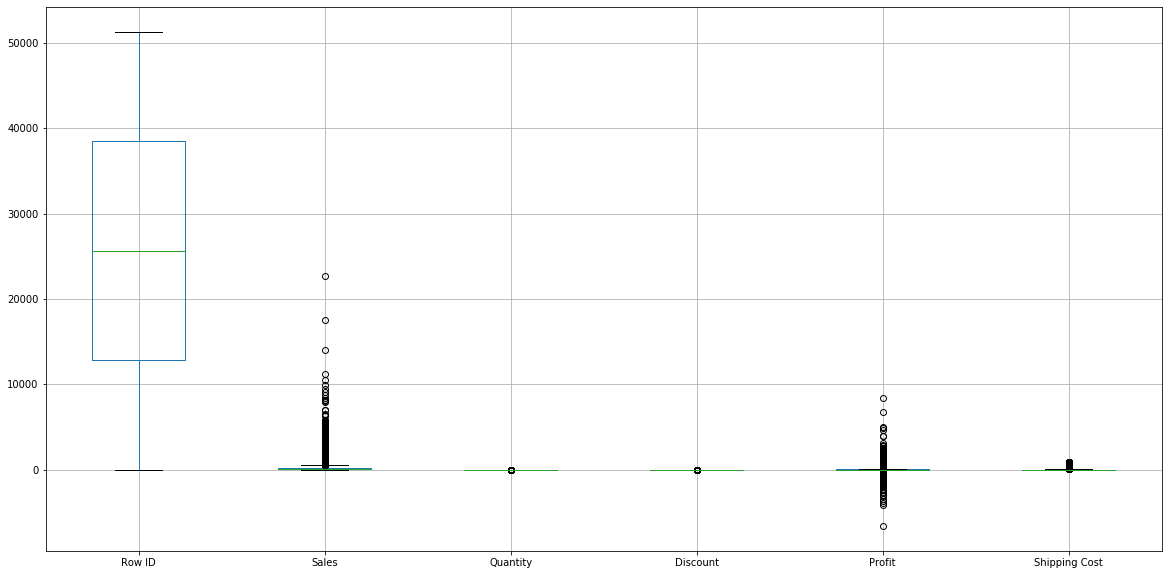

In [9]:
data.boxplot(figsize=(20,10))

In [10]:
#檢視是否有重複值
data.duplicated().sum()

0

In [11]:
#將資料依照Order Date進行排序
data_sorted = data.sort_values(by='Order Date',ascending=True,na_position='first')
data_sorted.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
25084,48883,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
22951,22253,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
9352,42433,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
42055,22254,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium
31579,11731,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High


In [12]:
#為日後可以使用年、月當作分析維度，從Order Date中擷取出年、月值當作新欄位
dt = data_sorted['Order Date'].astype(str).head()

In [13]:
data_sorted['Order Year'] = data_sorted['Order Date'].dt.year
data_sorted['Order Month'] = data_sorted['Order Date'].values.astype('datetime64[M]')

In [14]:
data_sorted.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
Order Year                 int64
Order Month       datetime64[ns]
dtype: object

In [15]:
#建立一個資料集，用來分析銷售額與利潤
sales = data_sorted[['Order Date','Order Year','Order Month','Sales','Profit']]
sales.head()

,Order Date,Order Year,Order Month,Sales,Profit
25084,2011-01-01,2011,2011-01-01,66.120,29.640
22951,2011-01-01,2011,2011-01-01,120.366,36.036
9352,2011-01-01,2011,2011-01-01,408.300,106.140
42055,2011-01-01,2011,2011-01-01,55.242,15.342
31579,2011-01-01,2011,2011-01-01,44.865,-26.055


<Figure size 1440x720 with 0 Axes>

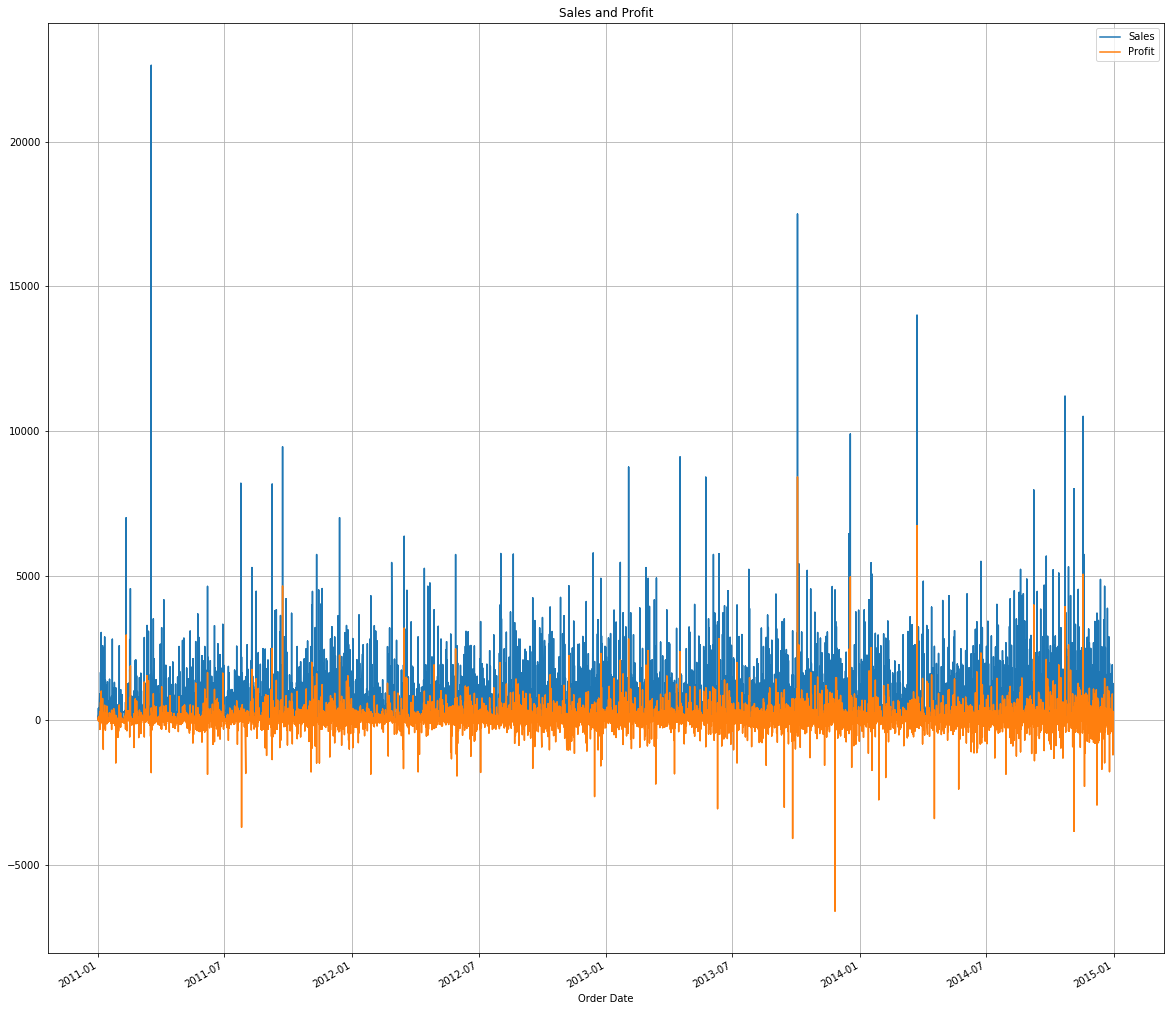

In [16]:
plt.figure(figsize=(20,10))
sales1 = sales[['Order Date','Sales','Profit']]
sales1.index = sales1['Order Date']
sales1[['Sales','Profit']].plot(kind='line',figsize=(20,19),title='Sales and Profit')
plt.grid()
plt.show()

In [17]:
#將年、月當作分析維度對銷售量與利潤進行分析
sales_by_ym=sales.groupby(['Order Year','Order Month']).sum()
sales_by_ym

Sales       Profit
Order Year Order Month                           
2011       2011-01-01    98898.48886   8321.80096
           2011-02-01    91152.15698  12417.90698
           2011-03-01   145729.36736  15303.56826
           2011-04-01   116915.76418  12902.32438
           2011-05-01   146747.83610  12183.82870
           2011-06-01   215207.38022  23415.24702
           2011-07-01   115510.41912   5585.00352
           2011-08-01   207581.49122  23713.66772
           2011-09-01   290214.45534  35776.88394
           2011-10-01   199071.26404  25963.41834
           2011-11-01   298496.53752  32709.17772
           2011-12-01   333925.73460  40647.98400
2012       2012-01-01   135780.72024  10401.63764
           2012-02-01   100510.21698  15000.09618
           2012-03-01   163076.77116  17992.91756
           2012-04-01   161052.26952  17366.96722
           2012-05-01   208364.89124  29876.70374
           2012-06-01   256175.69842  34407.15362
           2012-07-01   145236.78512  15585.38842
           2012-08-01   303142.94238  43573.87858
           2012-09-01   289389.16564  27776.18034
           2012-10-01   252939.85020  30662.88270
           2012-11-01   323512.41690  31820.72180
           2012-12-01   338256.96660  32950.75130
2013       2013-01-01   199185.90738  26810.55968
           2013-02-01   167239.65040  23762.49610
           2013-03-01   198594.03012  23433.77462
           2013-04-01   177821.31684  19462.03844
           2013-05-01   260498.56470  28495.69410
           2013-06-01   396519.61190  45478.41340
           2013-07-01   229928.95200  28863.82720
           2013-08-01   326488.78936  31023.66846
           2013-09-01   376619.24568  38905.66778
           2013-10-01   293406.64288  42433.22258
           2013-11-01   373989.36010  48062.99670
           2013-12-01   405454.37802  50202.87112
2014       2014-01-01   241268.55566  28001.38626
           2014-02-01   184837.35556  19751.69996
           2014-03-01   263100.77262  37357.26052
           2014-04-01   242771.86130  23782.30120
           2014-05-01   288401.04614  33953.55774
           2014-06-01   401814.06310  43778.60280
           2014-07-01   258705.68048  28035.87258
           2014-08-01   456619.94236  53542.89496
           2014-09-01   481157.24370  67979.45110
           2014-10-01   422766.62916  58209.83476
           2014-11-01   555279.02700  62856.58790
           2014-12-01   503143.69348  46916.52068

In [18]:
#將Sales與Profit欄位型態變成integer
sales_by_ym = sales_by_ym.astype({'Sales':'int32','Profit':'int32'})

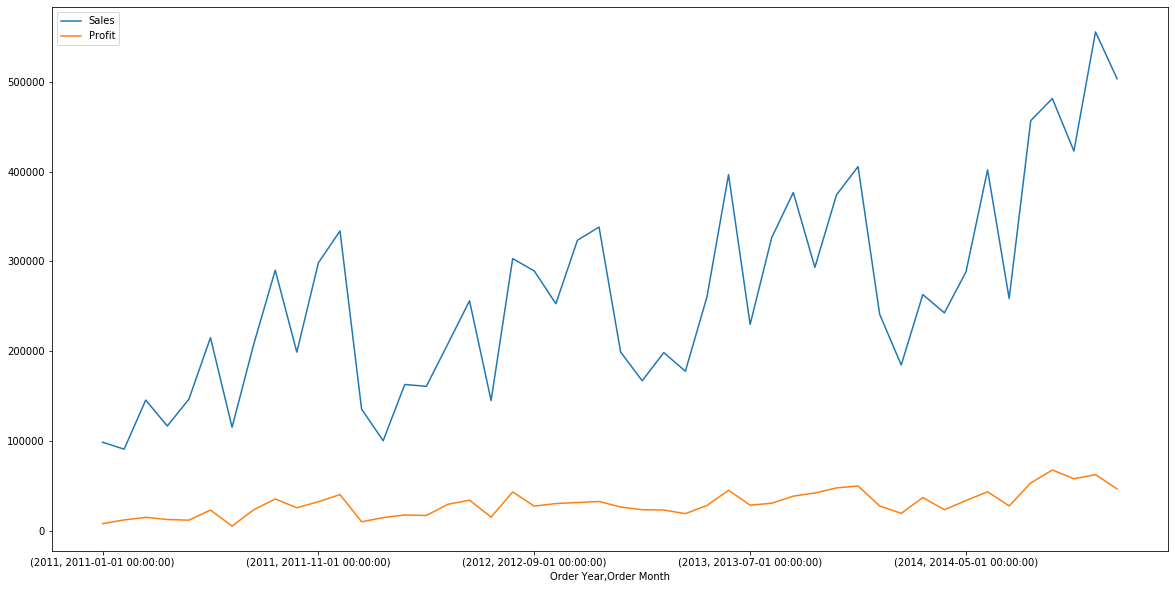

In [19]:
sales_by_ym.plot(kind='line',figsize=(20,10))

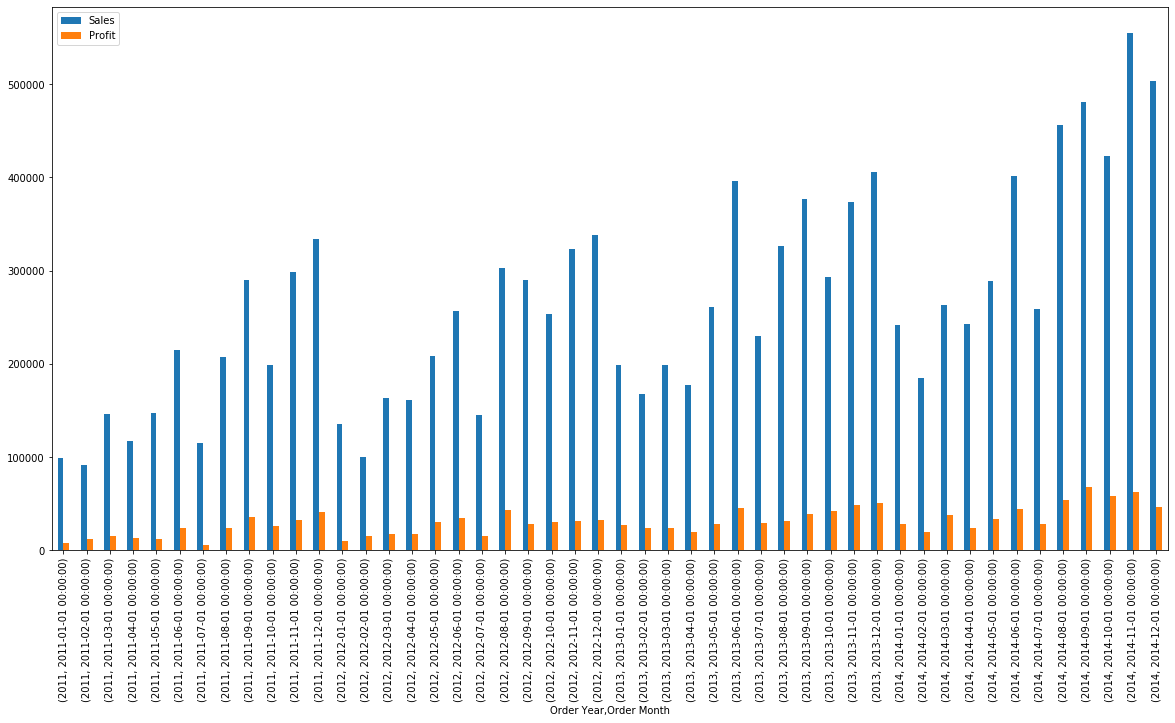

In [20]:
sales_by_ym.plot(kind='bar',figsize=(20,10))

In [21]:
y2011=sales_by_ym.loc[(2011,slice(None)),:].reset_index()
y2012=sales_by_ym.loc[(2012,slice(None)),:].reset_index()
y2013=sales_by_ym.loc[(2013,slice(None)),:].reset_index()
y2014=sales_by_ym.loc[(2014,slice(None)),:].reset_index()

y2014

,Order Year,Order Month,Sales,Profit
0,2014,2014-01-01,241268,28001
1,2014,2014-02-01,184837,19751
2,2014,2014-03-01,263100,37357
3,2014,2014-04-01,242771,23782
4,2014,2014-05-01,288401,33953
5,2014,2014-06-01,401814,43778
6,2014,2014-07-01,258705,28035
7,2014,2014-08-01,456619,53542
8,2014,2014-09-01,481157,67979
9,2014,2014-10-01,422766,58209


In [22]:
#建構年度銷售額表
sales_y = pd.concat([y2011['Sales'],y2012['Sales'],y2013['Sales'],y2014['Sales']],axis=1)
sales_y

,Sales,Sales,Sales,Sales
0,98898,135780,199185,241268
1,91152,100510,167239,184837
2,145729,163076,198594,263100
3,116915,161052,177821,242771
4,146747,208364,260498,288401
5,215207,256175,396519,401814
6,115510,145236,229928,258705
7,207581,303142,326488,456619
8,290214,289389,376619,481157
9,199071,252939,293406,422766


In [23]:
#微調新建的年度銷售額表
sales_y.columns = ['Sales_2001','Sales_2012','Sales_2013','Sales_2014']
sales_y.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sales_y

,Sales_2001,Sales_2012,Sales_2013,Sales_2014
Jan,98898,135780,199185,241268
Feb,91152,100510,167239,184837
Mar,145729,163076,198594,263100
Apr,116915,161052,177821,242771
May,146747,208364,260498,288401
Jun,215207,256175,396519,401814
Jul,115510,145236,229928,258705
Aug,207581,303142,326488,456619
Sep,290214,289389,376619,481157
Oct,199071,252939,293406,422766


In [24]:
#調整Dataframe的顯示顏色，銷售量越高其顏色越深
sales_y.style.background_gradient()

,Sales_2001,Sales_2012,Sales_2013,Sales_2014
Jan,98898,135780,199185,241268
Feb,91152,100510,167239,184837
Mar,145729,163076,198594,263100
Apr,116915,161052,177821,242771
May,146747,208364,260498,288401
Jun,215207,256175,396519,401814
Jul,115510,145236,229928,258705
Aug,207581,303142,326488,456619
Sep,290214,289389,376619,481157
Oct,199071,252939,293406,422766


In [25]:
sales_y_sum = sales_y.sum()
sales_y_sum

Sales_2001    2259445
Sales_2012    2677431
Sales_2013    3405740
Sales_2014    4299860
dtype: int64

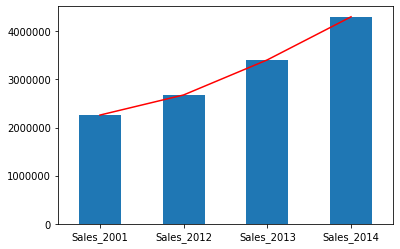

In [26]:
sales_y_sum.plot(kind='bar')
sales_y_sum.plot(kind='line',color='r')

In [27]:
#計算銷售額年增率
r12 = sales_y_sum[1]/sales_y_sum[0]-1
r13 = sales_y_sum[2]/sales_y_sum[1]-1
r14 = sales_y_sum[3]/sales_y_sum[2]-1
r_rate = [0,r12,r13,r14]

sales_sum_r = pd.DataFrame({'sales_sum':sales_y_sum})
sales_sum_r['rise_rate'] = r_rate
sales_sum_r

,sales_sum,rise_rate
Sales_2001,2259445,0.000000
Sales_2012,2677431,0.184995
Sales_2013,3405740,0.272018
Sales_2014,4299860,0.262533


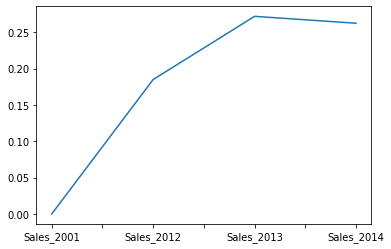

In [28]:
sales_sum_r['rise_rate'].plot(kind='line')

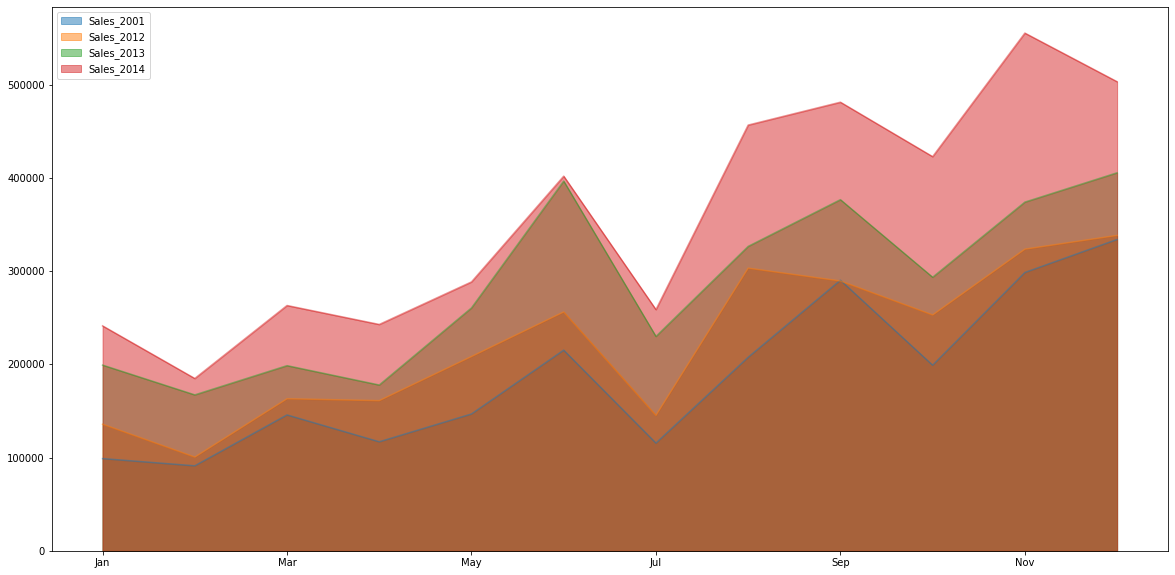

In [29]:
sales_y.plot.area(stacked=False,figsize=(20,10))

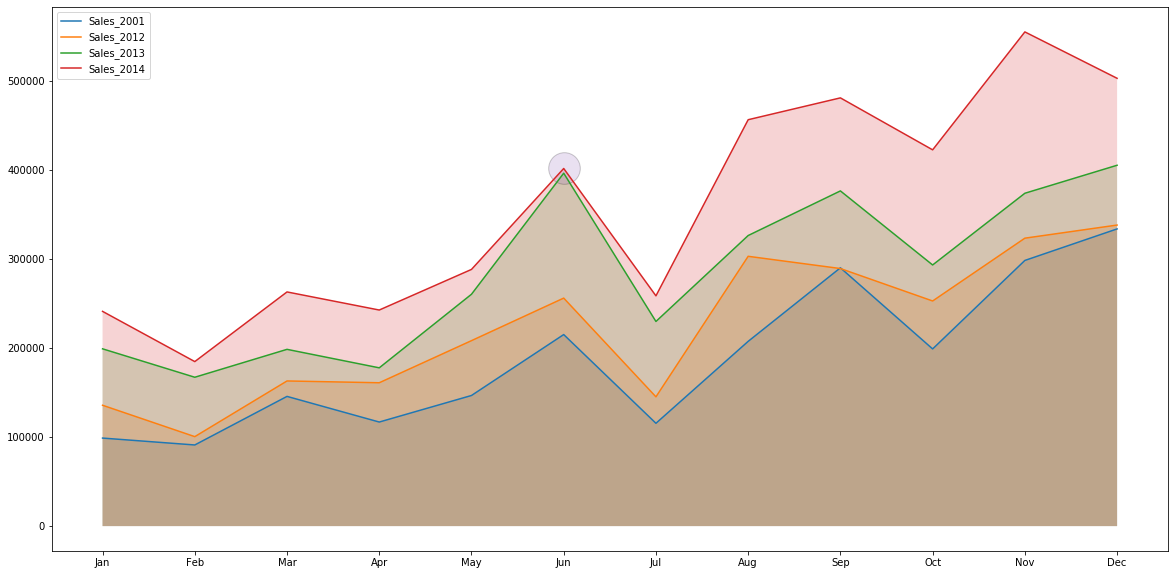

In [30]:
import matplotlib.patches as mpatches

x = sales_y.index
y = [sales_y[col].values for col in sales_y.columns]
labels = sales_y.columns

c1 = ['Jun',sales_y.loc['Jun']['Sales_2014']]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()

for i in range(4):
    ax.plot(x,y[i],label=labels[i])
    ax.fill_between(x,0,y[i],alpha=0.2)

ax.scatter(c1[0],c1[1],s=1000,edgecolors='black',alpha=0.2)
ax.legend()

In [31]:
#為釐清問題，另外針對Quantity進行分析
sales_q = data_sorted[['Order Date','Order Year','Order Month','Quantity']]
sales_q_by_ym=sales_q.groupby(['Order Year','Order Month']).sum()
q2011=sales_q_by_ym.loc[(2011,slice(None)),:].reset_index()
q2012=sales_q_by_ym.loc[(2012,slice(None)),:].reset_index()
q2013=sales_q_by_ym.loc[(2013,slice(None)),:].reset_index()
q2014=sales_q_by_ym.loc[(2014,slice(None)),:].reset_index()
sales_q_y = pd.concat([q2011['Quantity'],q2012['Quantity'],q2013['Quantity'],q2014['Quantity']],axis=1)
sales_q_y.columns = ['Qty_2001','Qty_2012','Qty_2013','Qty_2014']
sales_q_y.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

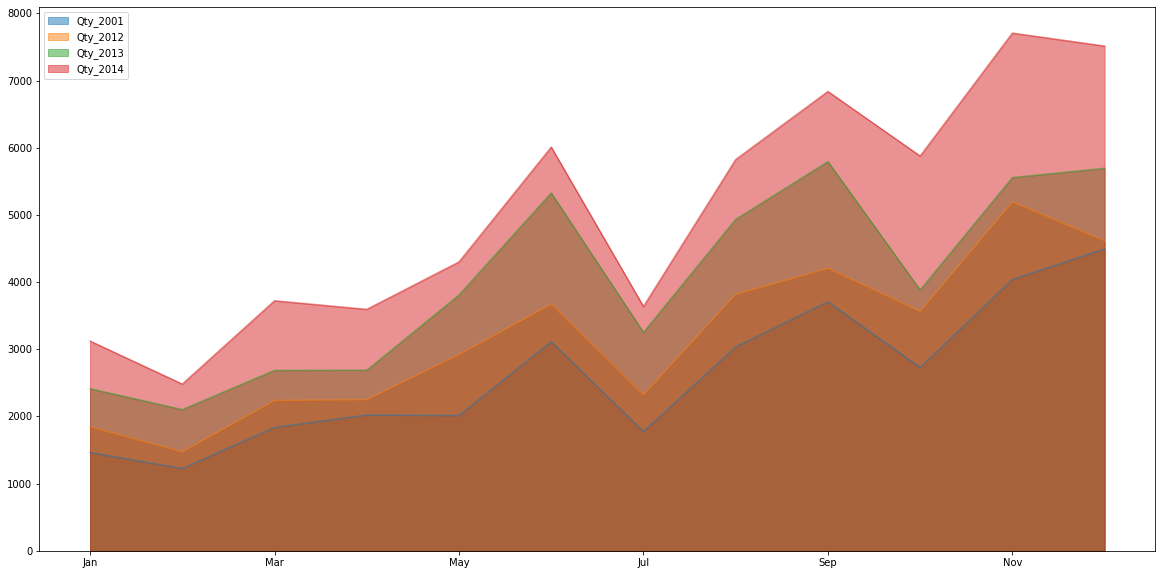

In [32]:
sales_q_y.plot.area(stacked=False,figsize=(20,10))

In [33]:
sales_q_y.style.background_gradient()

,Qty_2001,Qty_2012,Qty_2013,Qty_2014
Jan,1463,1845,2413,3122
Feb,1224,1473,2102,2482
Mar,1836,2237,2686,3722
Apr,2020,2250,2688,3594
May,2013,2921,3808,4300
Jun,3112,3671,5327,6009
Jul,1774,2321,3252,3637
Aug,3035,3818,4934,5824
Sep,3707,4205,5793,6837
Oct,2727,3563,3883,5876


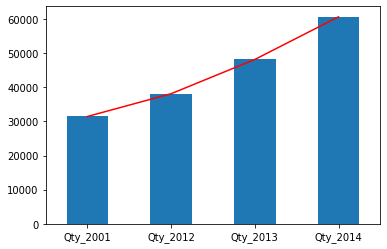

In [34]:
#計算年銷售量表
sales_q_sum = sales_q_y.sum()
sales_q_sum.plot(kind='bar')
sales_q_sum.plot(kind='line',color='r')

In [35]:
#計算銷售量年增率
q12 = sales_q_sum[1]/sales_q_sum[0]-1
q13 = sales_q_sum[2]/sales_q_sum[1]-1
q14 = sales_q_sum[3]/sales_q_sum[2]-1
r_rate = [0,q12,q13,q14]

sales_sum_q = pd.DataFrame({'sales_sum':sales_q_sum})
sales_sum_q['rise_rate'] = r_rate
sales_sum_q

,sales_sum,rise_rate
Qty_2001,31443,0.000000
Qty_2012,38111,0.212066
Qty_2013,48136,0.263047
Qty_2014,60622,0.259390


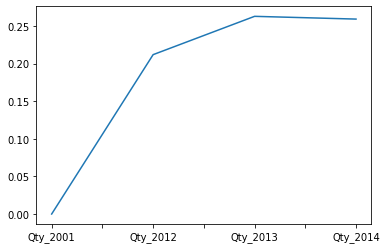

In [36]:
sales_sum_q['rise_rate'].plot()

In [37]:
sales_p = data_sorted[['Order Date','Order Year','Order Month','Profit']]
sales_p = sales_p.astype({'Profit':'int32'})
sales_p_by_ym=sales_p.groupby(['Order Year','Order Month']).sum()
p2011=sales_p_by_ym.loc[(2011,slice(None)),:].reset_index()
p2012=sales_p_by_ym.loc[(2012,slice(None)),:].reset_index()
p2013=sales_p_by_ym.loc[(2013,slice(None)),:].reset_index()
p2014=sales_p_by_ym.loc[(2014,slice(None)),:].reset_index()
sales_p_y = pd.concat([p2011['Profit'],p2012['Profit'],p2013['Profit'],p2014['Profit']],axis=1)
sales_p_y.columns = ['Profit_2001','Profit_2012','Profit_2013','Profit_2014']
sales_p_y.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [38]:
sales_p_y.style.background_gradient()

,Profit_2001,Profit_2012,Profit_2013,Profit_2014
Jan,8224,10268,26621,27765
Feb,12327,14912,23614,19565
Mar,15152,17847,23243,37071
Apr,12754,17199,19261,23561
May,12028,29646,28217,33649
Jun,23229,34135,45111,43363
Jul,5478,15432,28618,27779
Aug,23471,43266,30666,53094
Sep,35492,27473,38500,67409
Oct,25759,30424,42171,57807


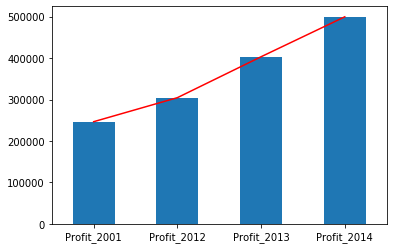

In [39]:
#計算年利潤表
sales_p_sum = sales_p_y.sum()
sales_p_sum.plot(kind='bar')
sales_p_sum.plot(kind='line',color='r')

In [40]:
profit_sum = pd.DataFrame({'profit_sum':sales_p_sum})
profit_sum['Year'] = [2011,2012,2013,2014]

profit_sum

,profit_sum,Year
Profit_2001,246690,2011
Profit_2012,304664,2012
Profit_2013,403443,2013
Profit_2014,499839,2014


In [41]:
sales_sum = pd.DataFrame({'sales_sum':sales_y_sum})
sales_sum['Year'] = [2011,2012,2013,2014]

sales_sum

,sales_sum,Year
Sales_2001,2259445,2011
Sales_2012,2677431,2012
Sales_2013,3405740,2013
Sales_2014,4299860,2014


In [42]:
#計算年利潤率表
profit_sum = pd.merge(profit_sum, sales_sum)
profit_sum["profit_rate"] = profit_sum["profit_sum"] / profit_sum["sales_sum"]
profit_sum

,profit_sum,Year,sales_sum,profit_rate
0,246690,2011,2259445,0.109182
1,304664,2012,2677431,0.113790
2,403443,2013,3405740,0.118460
3,499839,2014,4299860,0.116245


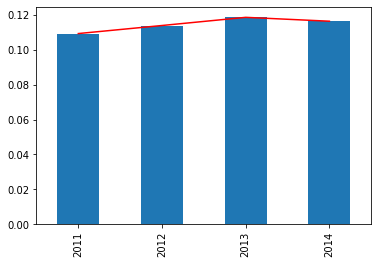

In [43]:
profit_rate_sum = profit_sum['profit_rate']
profit_rate_sum.index=['2011','2012','2013','2014']
profit_rate_sum.plot(kind='line',color='r')
profit_rate_sum.plot(kind='bar')

# 客單價分析
### 客單價 = 總消費金額/總消費次數

In [44]:
#客單價計算
consume_num = []
consume_price = []

for i in range(2011,2015):
    data = data_sorted[data_sorted['Order Year']==i]
    price = data[['Order Date','Customer ID','Sales']]

    # 總消費金額
    price_dd=price.drop_duplicates(subset=['Order Date', 'Customer ID'])

    # 總消費次數=同一天裡，同一個客戶的所有消費都算一次消費
    total_num=price_dd.shape[0]
    print('{}年總消費次數='.format(i),total_num)
    consume_num.append(total_num)

    unit_price = price['Sales'].sum()/total_num
    print('{}年客單價='.format(i), unit_price,'\n')
    consume_price.append(unit_price)

2011年總消費次數= 4453
2011年客單價= 507.3997070604087 

2012年總消費次數= 5392
2012年客單價= 496.55762136498515 

2013年總消費次數= 6753
2013年客單價= 504.3308824788983 

2014年總消費次數= 8696
2014年客單價= 494.4647965225391 



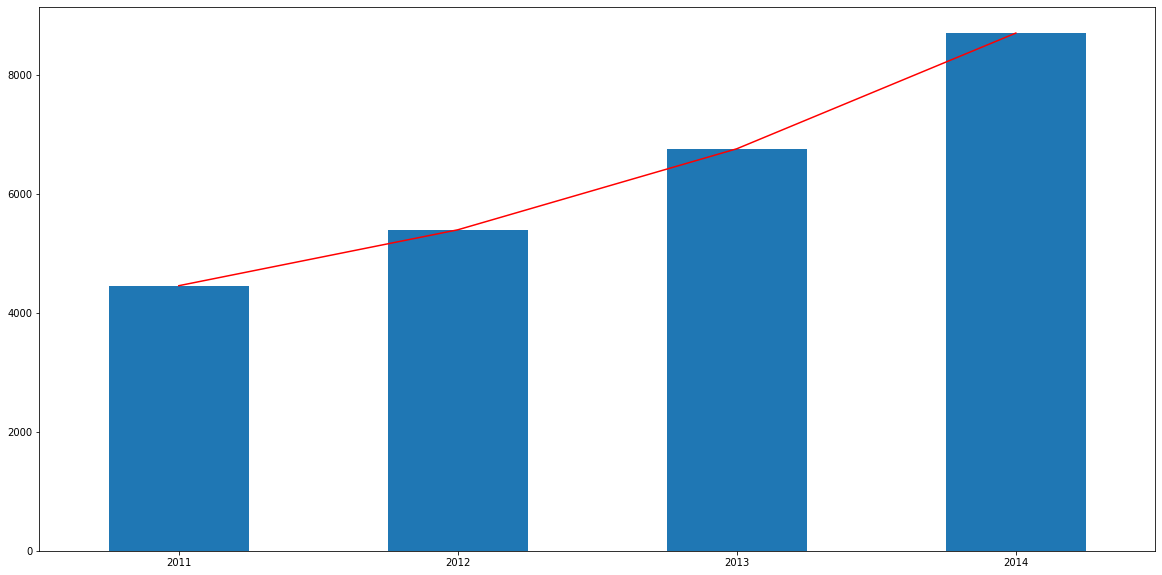

In [45]:
consume_num_price = pd.DataFrame({'num':consume_num,'price':consume_price},index=['2011','2012','2013','2014'])
consume_num_price['num'].plot(kind='bar',figsize=(20,10))
consume_num_price['num'].plot(kind='line',color='r',figsize=(20,10))

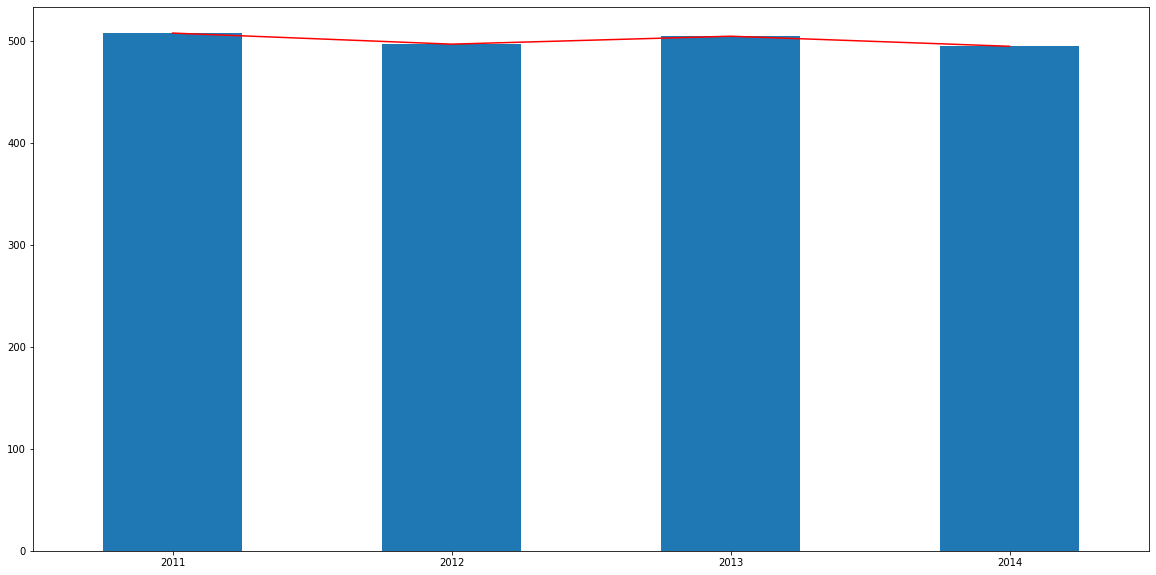

In [46]:
consume_num_price['price'].plot(kind='bar',figsize=(20,10))
consume_num_price['price'].plot(kind='line',color='r',figsize=(20,10))

In [47]:
Market_Year_Sales = data_sorted.groupby(['Market', 'Order Year']).agg({'Sales':'sum'}).reset_index().rename(columns={'Sales':'Sales_amounts'})
Market_Year_Sales.head()

,Market,Order Year,Sales_amounts
0,APAC,2011,6.392453e+05
1,APAC,2012,7.627193e+05
2,APAC,2013,9.745809e+05
3,APAC,2014,1.209199e+06
4,Africa,2011,1.271873e+05


In [48]:
Market_Year_Sales.groupby(['Market','Order Year'])[['Sales_amounts']].sum()

Sales_amounts
Market Order Year               
APAC   2011         6.392453e+05
       2012         7.627193e+05
       2013         9.745809e+05
       2014         1.209199e+06
Africa 2011         1.271873e+05
       2012         1.444807e+05
       2013         2.290688e+05
       2014         2.830364e+05
Canada 2011         8.509110e+03
       2012         1.609680e+04
       2013         1.916115e+04
       2014         2.316111e+04
EMEA   2011         1.364203e+05
       2012         1.634144e+05
       2013         2.046407e+05
       2014         3.016859e+05
EU     2011         4.787433e+05
       2012         6.554617e+05
       2013         7.616804e+05
       2014         1.042204e+06
LATAM  2011         3.850982e+05
       2012         4.647333e+05
       2013         6.081408e+05
       2014         7.066329e+05
US     2011         4.842475e+05
       2012         4.705325e+05
       2013         6.084738e+05
       2014         7.339470e+05

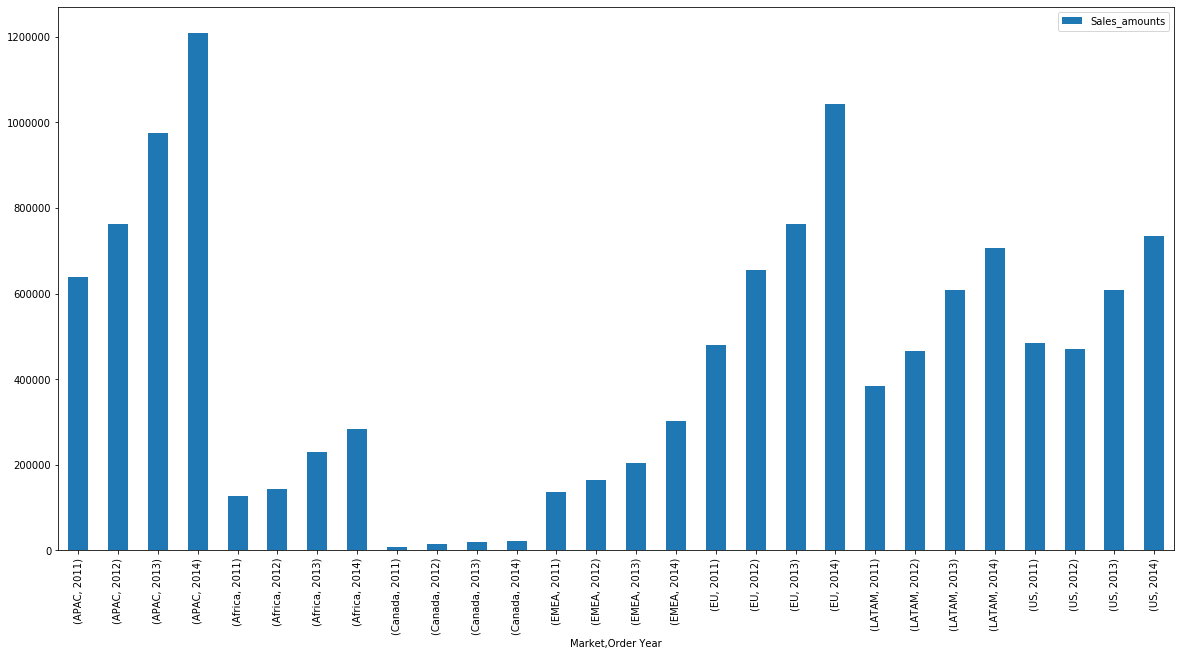

In [49]:
Market_Year_Sales.groupby(['Market','Order Year'])[['Sales_amounts']].sum().plot(kind='bar',figsize=(20,10))

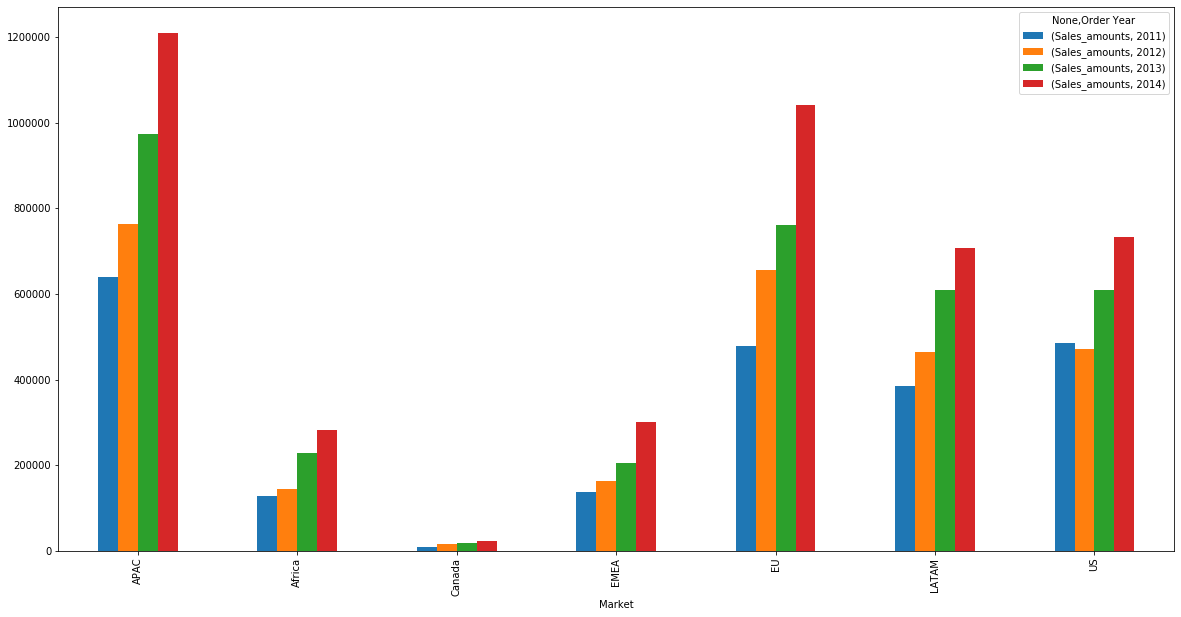

In [50]:
Market_Year_Sales.groupby(['Market','Order Year'])[['Sales_amounts']].sum().unstack().plot(kind='bar',figsize=(20,10))

/Users/frank/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, '2011-2014 market sales')

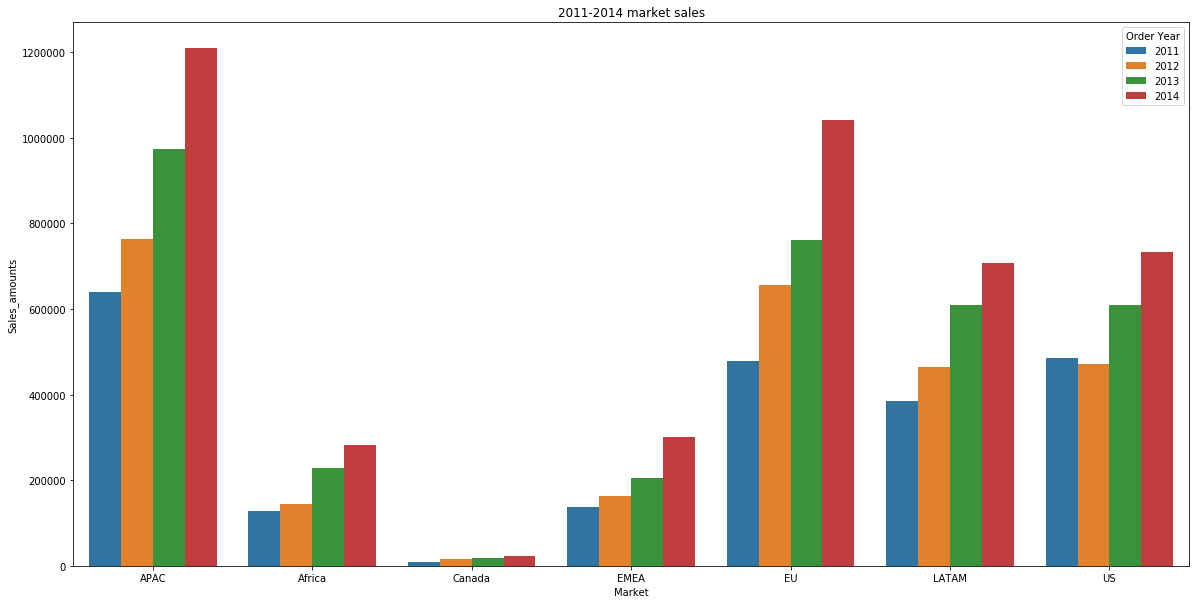

In [51]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(x='Market', y='Sales_amounts', hue='Order Year', data = Market_Year_Sales)
plt.title('2011-2014 market sales')

In [52]:
Market_Sales = data_sorted.groupby(['Market']).agg({'Sales':'sum'})
Market_Sales["percent"] = Market_Sales["Sales"] / data_sorted["Sales"].sum()
Market_Sales.style.background_gradient()

,Sales,percent
Market,,
APAC,3585744.129000,0.283626
Africa,783773.211000,0.061995
Canada,66928.170000,0.005294
EMEA,806161.311000,0.063766
EU,2938089.061500,0.232398
LATAM,2164605.167080,0.171217
US,2297200.860300,0.181705


# 產品分析

In [53]:
#找出銷售量前10的產品
productId_count = data_sorted.groupby('Product ID').count()['Customer ID'].sort_values(ascending=False)
productId_count.head(10)

Product ID
OFF-AR-10003651    35
OFF-AR-10003829    31
OFF-BI-10002799    30
OFF-BI-10003708    30
FUR-CH-10003354    28
OFF-BI-10002570    27
OFF-BI-10004140    25
OFF-BI-10004195    24
OFF-BI-10001808    24
OFF-BI-10004632    24
Name: Customer ID, dtype: int64

In [54]:
#找出銷售額前10的產品
productId_amount = data_sorted.groupby('Product ID').sum()['Sales'].sort_values(ascending=False)
productId_amount.head(10)

Product ID
TEC-CO-10004722    61599.8240
TEC-PH-10004664    30041.5482
OFF-BI-10003527    27453.3840
TEC-MA-10002412    22638.4800
TEC-PH-10004823    22262.1000
FUR-CH-10002024    21870.5760
FUR-CH-10000027    21329.7300
OFF-AP-10004512    21147.0840
FUR-TA-10001889    20730.7557
OFF-BI-10001359    19823.4790
Name: Sales, dtype: float64

In [55]:
#找出利潤前10的產品
productId_Profit= data_sorted.groupby('Product ID').sum()['Profit'].sort_values(ascending=False)
productId_Profit.head(10)

Product ID
TEC-CO-10004722    25199.9280
OFF-AP-10004512    10345.5840
TEC-PH-10004823     8121.4800
OFF-BI-10003527     7753.0390
TEC-CO-10001449     6983.8836
FUR-CH-10002250     6123.2553
TEC-PH-10004664     5455.9482
OFF-AP-10002330     5452.4640
TEC-PH-10000303     5356.8060
FUR-CH-10002203     5003.1000
Name: Profit, dtype: float64

In [56]:
#將Category與Sub Category整合在一起成為一個新類別，分成更多類別 
data_sorted['Category Sub Category'] = data_sorted[['Category','Sub-Category']].apply(lambda x:str(x[0])+'_'+str(x[1]),axis=1)
df_Category_Sub_Category=data_sorted.groupby("Category Sub Category").agg({"Profit":"sum","Sales":"sum"}).reset_index()
df_Category_Sub_Category.sort_values(by=["Sales"],ascending=False, inplace=True)

#計算類別商品的銷售額累計比率
df_Category_Sub_Category['cum_percent'] = df_Category_Sub_Category['Sales'].cumsum()/df_Category_Sub_Category['Sales'].sum()
df_Category_Sub_Category.style.background_gradient()

,Category Sub Category,Profit,Sales,cum_percent
16,Technology_Phones,216717.005800,1706824.139200,0.135007
14,Technology_Copiers,258567.548180,1509436.273280,0.254401
1,Furniture_Chairs,140396.267500,1501681.764200,0.373181
0,Furniture_Bookcases,161924.419500,1466572.241800,0.489184
11,Office Supplies_Storage,108461.489800,1127085.861400,0.578335
4,Office Supplies_Appliances,141680.589400,1011064.305000,0.658308
15,Technology_Machines,58867.873000,779060.067100,0.719931
3,Furniture_Tables,-64083.388700,757041.924400,0.779811
13,Technology_Accessories,129626.306200,749237.018500,0.839075
6,Office Supplies_Binders,72449.846000,461911.505700,0.875611


In [57]:
data_sorted[(data_sorted['Category']=='Furniture') & (data_sorted['Sub-Category']=='Tables')][['Discount','Profit']]

,Discount,Profit
14192,0.55,-70.3995
3973,0.00,445.2600
14103,0.60,-341.7360
399,0.20,-0.0720
13226,0.20,-16.6500
...,...,...
10829,0.60,-136.3620
431,0.35,202.1850
40949,0.70,-327.2280
9202,0.35,-27.1575


In [58]:
data_sorted[(data_sorted['Category']=='Furniture') & (data_sorted['Sub-Category']=='Tables')][['Discount','Profit']].describe()

,Discount,Profit
count,861.000000,861.000000
mean,0.290732,-74.429023
std,0.220513,402.973963
min,0.000000,-2750.280000
25%,0.200000,-205.608000
50%,0.300000,-34.647000
75%,0.450000,103.040000
max,0.850000,2071.440000


# 用戶分析

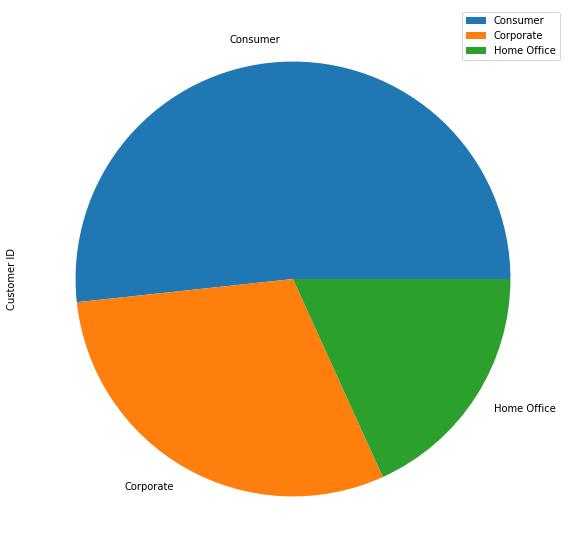

In [59]:
#客戶類型數量組成
Segment_customer = data_sorted.groupby(["Segment"]).agg({'Customer ID':'count'})
Segment_customer.plot(kind='pie',y='Customer ID',figsize=(20,10))

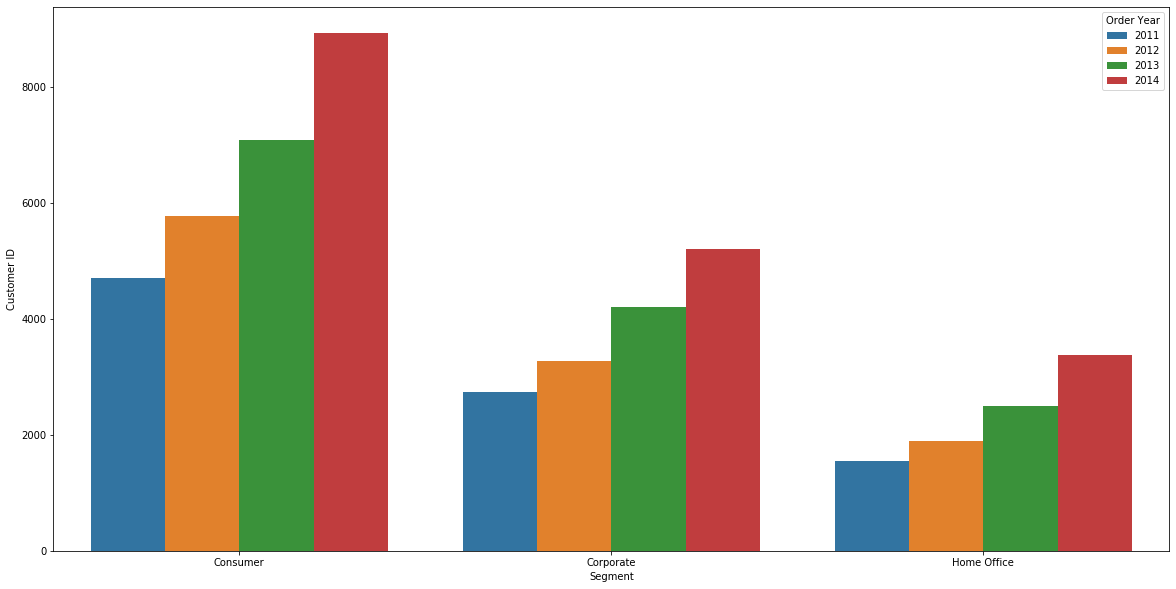

In [60]:
#不同客戶類型的數量與年度分析
Segment_Year = data_sorted.groupby(["Segment", 'Order Year']).agg({'Customer ID':'count'}).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='Segment', y='Customer ID', hue='Order Year', data = Segment_Year)

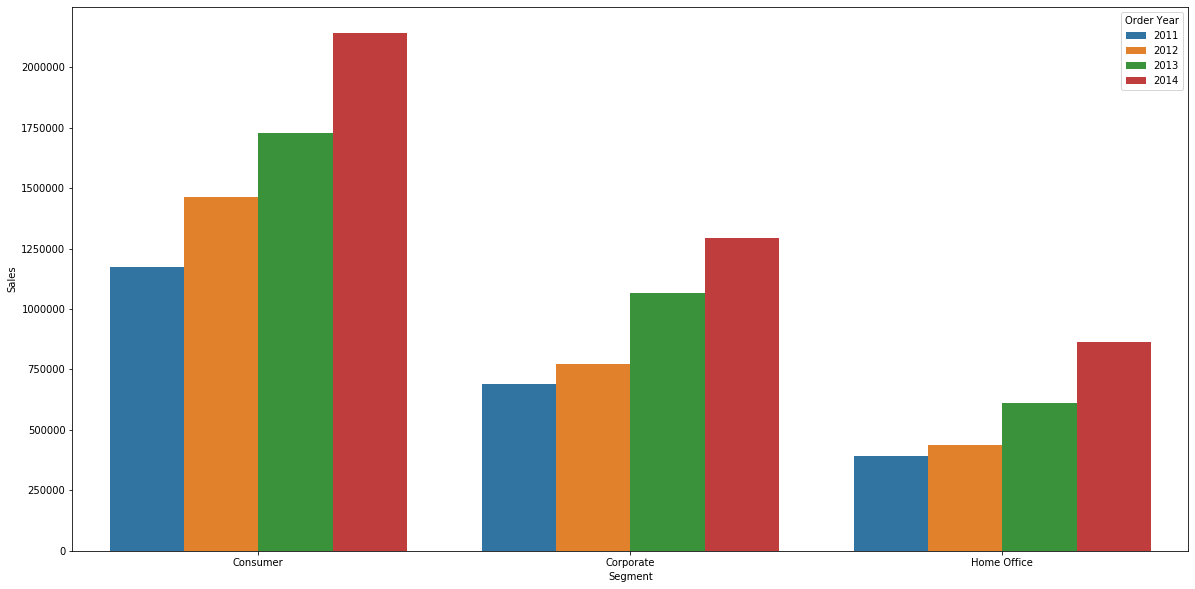

In [61]:
#不同客戶類型的銷售額與年度分析
Segment_sales = data_sorted.groupby(["Segment", 'Order Year']).agg({'Sales':'sum'}).reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='Segment', y='Sales', hue='Order Year', data = Segment_sales)

In [62]:
#客戶行為分析
grouped_Customer = data_sorted[['Customer ID','Order Date', 'Quantity', 'Sales', 'Order Month']].sort_values(['Order Date']).groupby('Customer ID')
grouped_Customer.head()

,Customer ID,Order Date,Quantity,Sales,Order Month
25084,AT-735,2011-01-01,4,66.120,2011-01-01
22951,JH-15985,2011-01-01,3,120.366,2011-01-01
9352,TB-11280,2011-01-01,2,408.300,2011-01-01
42055,JH-15985,2011-01-01,2,55.242,2011-01-01
31579,EM-14140,2011-01-01,3,44.865,2011-01-01
...,...,...,...,...,...
50156,AD-180,2014-12-26,2,5.304,2014-12-01
46138,AD-180,2014-12-26,1,11.904,2014-12-01
24376,DB-3555,2014-12-26,2,112.920,2014-12-01
45374,DB-3555,2014-12-26,1,18.180,2014-12-01


In [63]:
#每個客戶第一次購買的時間
customer_first_buy = grouped_Customer['Order Date'].agg(['min']).reset_index()
customer_first_buy

,Customer ID,min
0,AA-10315,2011-03-31
1,AA-10375,2011-04-21
2,AA-10480,2011-05-04
3,AA-10645,2011-01-26
4,AA-315,2011-06-08
...,...,...
1585,YS-21880,2011-06-01
1586,ZC-11910,2014-06-14
1587,ZC-21910,2011-09-23
1588,ZD-11925,2011-12-07


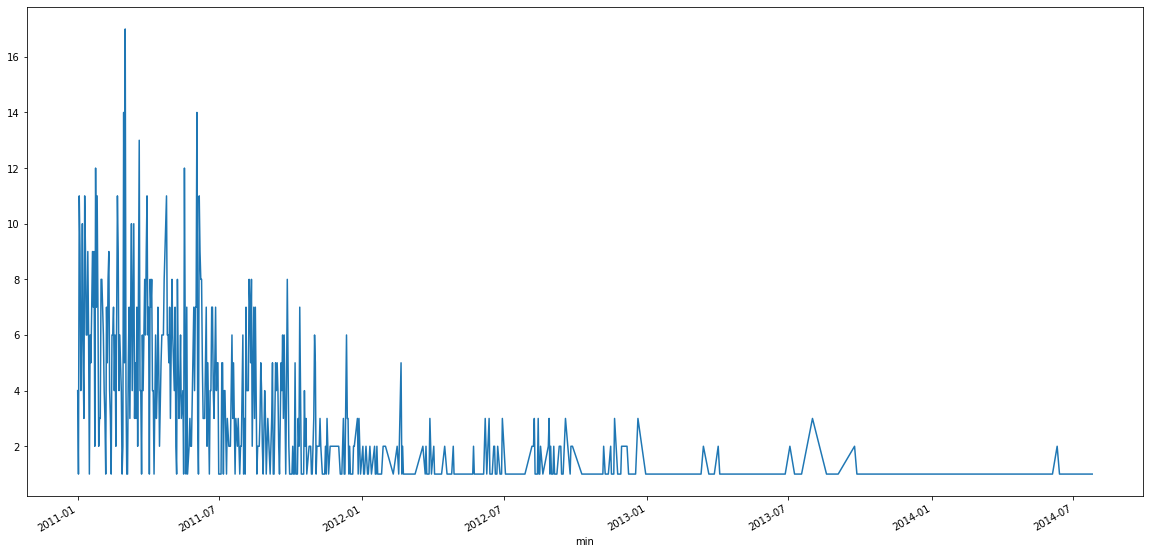

In [64]:
customer_first_buy.groupby(['min'])['Customer ID'].count().plot(kind='line',figsize=(20,10))

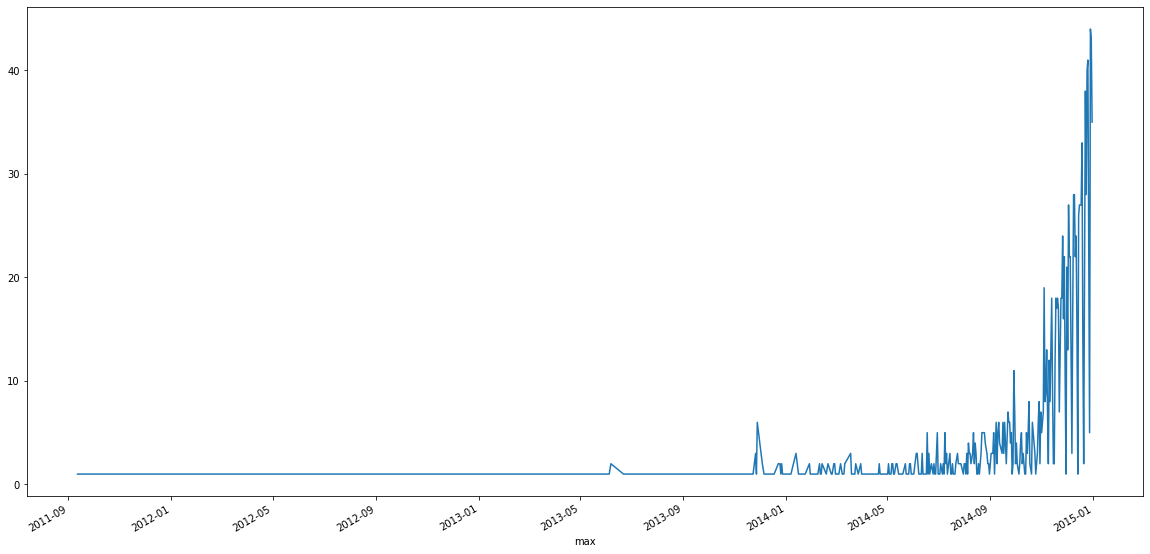

In [65]:
#每個客戶最後一次購買的時間
customer_latest_buy = grouped_Customer['Order Date'].agg(['max']).reset_index()
customer_latest_buy.groupby(['max'])['Customer ID'].count().plot(kind='line',figsize=(20,10))

In [66]:
#找出僅購買一次的客戶
Customer_life = grouped_Customer['Order Date'].agg(['min','max'])
(Customer_life['min'] == Customer_life['max']).value_counts()

False    1580
True       10
dtype: int64

In [67]:
#RFM分析
rfm = data_sorted.pivot_table(index='Customer ID',
                              values = ["Quantity","Sales","Order Date"],
                              aggfunc={"Quantity":"sum","Sales":"sum","Order Date":"max"})

# 以所有客戶中最後一次交易日期為基準，找出每個客戶最後一次交易日期與max_order_date的差距當作R(recency)
rfm['R'] = (rfm['Order Date'].max() - rfm['Order Date'])/np.timedelta64(1,'D')
# 每個客戶的總銷售量當作F(frequency),買的多次對應到買的量大
# 每個客戶的總銷售額為M(Monetary)
rfm.rename(columns={'Quantity':'F','Sales':'M'},inplace = True)
rfm.head()

,Order Date,F,M,R
Customer ID,,,,
AA-10315,2014-12-23,145,13747.41300,8.0
AA-10375,2014-12-25,139,5884.19500,6.0
AA-10480,2014-08-28,150,17695.58978,125.0
AA-10645,2014-12-03,267,15343.89070,28.0
AA-315,2014-12-29,20,2243.25600,2.0


In [68]:
# 以平均值當作基準，>avg => 1,<avg => 0
rfm[['R','F','M']].apply(lambda x:x-x.mean())

def rfm_func(x):
    level =x.apply(lambda x:'1'if x>0 else '0')
    level =level.R +level.F +level.M
    d = {
        "111":"重要價值客戶",
        "011":"重要保持客戶",
        "101":"重要挽留客戶",
        "001":"重要開發客戶",
        "110":"普通價值客戶",
        "010":"普通保持客戶",
        "100":"普通挽留客戶",
        "000":"普通開發客戶"
    }
    result = d[level]
    return result

rfm['label']= rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis =1)
rfm.head()

,Order Date,F,M,R,label
Customer ID,,,,,
AA-10315,2014-12-23,145,13747.41300,8.0,重要保持客戶
AA-10375,2014-12-25,139,5884.19500,6.0,普通保持客戶
AA-10480,2014-08-28,150,17695.58978,125.0,重要價值客戶
AA-10645,2014-12-03,267,15343.89070,28.0,重要保持客戶
AA-315,2014-12-29,20,2243.25600,2.0,普通開發客戶


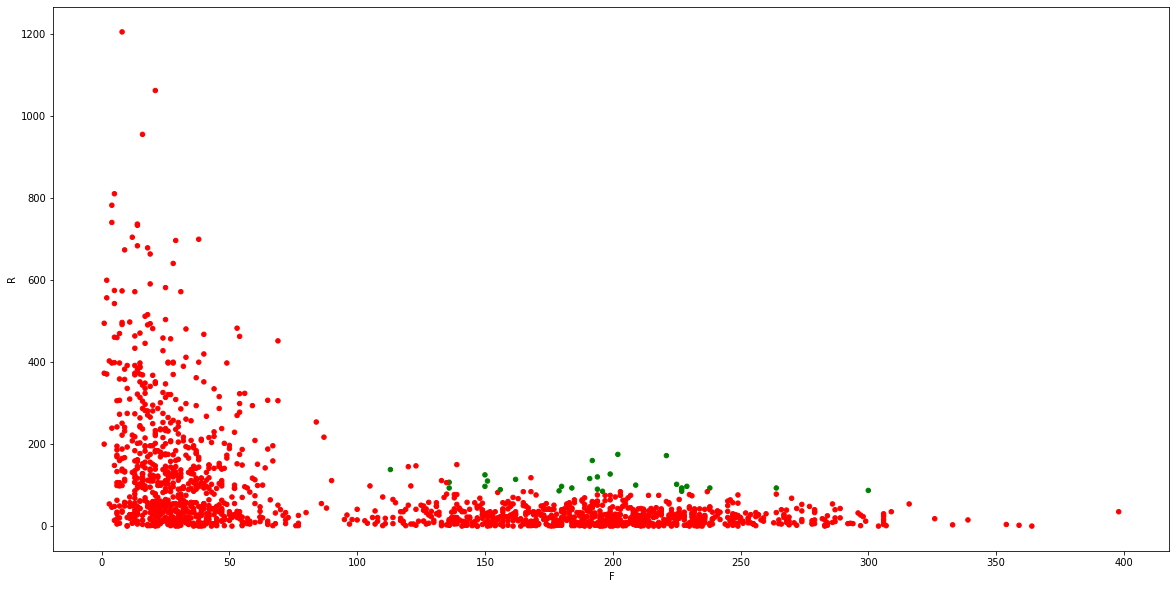

In [69]:
rfm.loc[rfm.label=='重要價值客戶','color']='g'
rfm.loc[~(rfm.label=='重要價值客戶'),'color']='r'
rfm.plot.scatter('F','R',c= rfm.color,figsize=(20,10))

In [70]:
rfm.groupby('label').count()[['color']]

,color
label,
普通保持客戶,48
普通價值客戶,7
普通挽留客戶,415
普通開發客戶,393
重要保持客戶,686
重要價值客戶,28
重要挽留客戶,1
重要開發客戶,12


In [71]:
pivoted_counts = data_sorted.pivot_table(index= 'Customer ID',
                                         columns= 'Order Month',
                                         values= 'Order Date',
                                          aggfunc= 'count').fillna(0)
# 消費次數大於一次的，都以1表示
df_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase.head()

Order Month,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,...,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01
Customer ID,,,,,,,,,,,,,,,,,,,,,
AA-10315,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
AA-10375,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,1,1
AA-10480,0,0,0,0,1,1,0,0,0,0,...,1,1,1,0,0,1,0,0,0,0
AA-10645,1,0,0,0,0,1,1,0,0,0,...,0,1,1,1,0,0,0,1,1,1
AA-315,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [72]:
def active_status(data):
    status = []
    for i in range(48):
        if data[i] == 0:
            if len(status)>0:
                if status[i-1] == "unreg":
                	#尚未註冊客戶
                    status.append("unreg")
                else:
                	#不活躍客戶
                    status.append("unactive")
            else:
                status.append("unreg")
            
        #如果本月有消費
        else:
            if len(status) == 0:
            	#新客戶
                status.append("new")
            else:
                if status[i-1] == "unactive":
                	#回頭客
                    status.append("return")
                elif status[i-1] == "unreg":
                    status.append("new")
                else:
                    status.append("active")
    return pd.Series(status)  

purchase_stats = df_purchase.apply(active_status,axis=1)
purchase_stats.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Customer ID,,,,,,,,,,,,,,,,,,,,,
AA-10315,unreg,unreg,new,unactive,unactive,unactive,return,unactive,return,unactive,...,unactive,unactive,unactive,return,unactive,return,unactive,unactive,unactive,return
AA-10375,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,return,...,unactive,unactive,unactive,unactive,return,active,active,unactive,return,active
AA-10480,unreg,unreg,unreg,unreg,new,active,unactive,unactive,unactive,unactive,...,return,active,active,unactive,unactive,return,unactive,unactive,unactive,unactive
AA-10645,new,unactive,unactive,unactive,unactive,return,active,unactive,unactive,unactive,...,unactive,return,active,active,unactive,unactive,unactive,return,active,active
AA-315,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,...,unactive,unactive,unactive,return,active,unactive,unactive,unactive,unactive,return


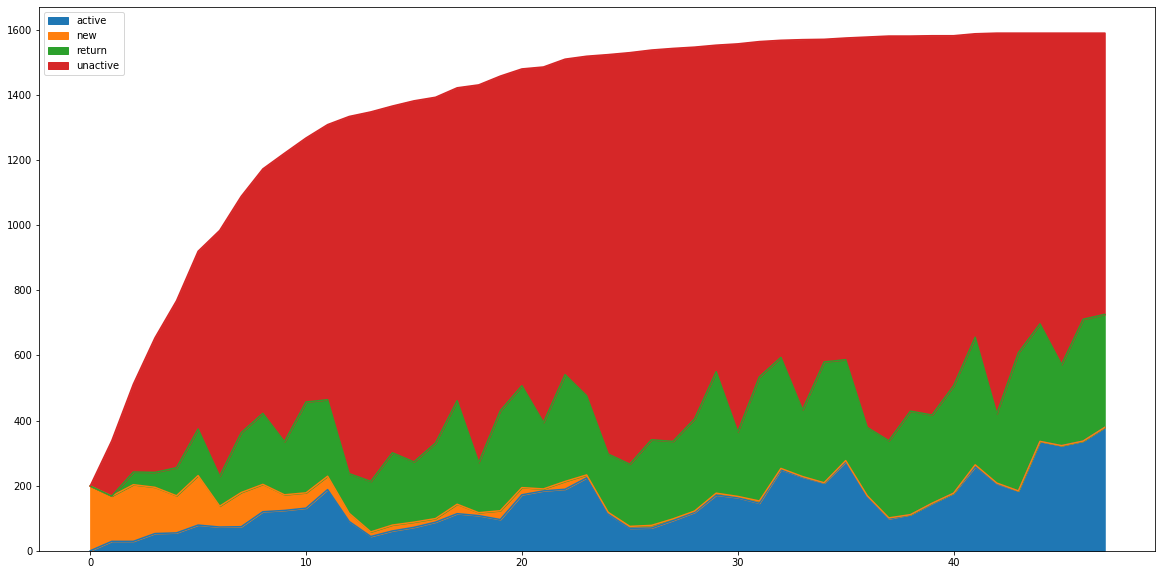

In [73]:
purchase_stats_ct = purchase_stats.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))

#使用0取代NaN 
purchase_stats_ct.fillna(0).T.plot(kind='area',figsize=(20,10))

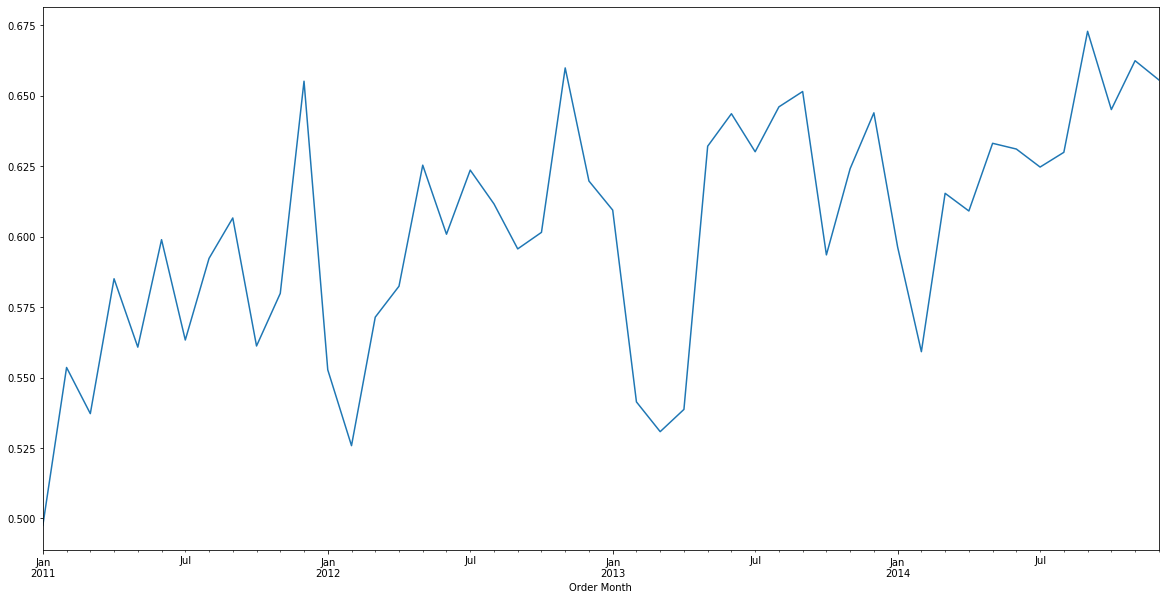

In [74]:
#重複購買率(如果該客戶本月購買一次以上，即稱為複購)
purchase_r = pivoted_counts.applymap(lambda x :1 if x>1 else np.NaN if x==0 else 0)
(purchase_r.sum()/purchase_r.count()).plot(figsize=(20,10))

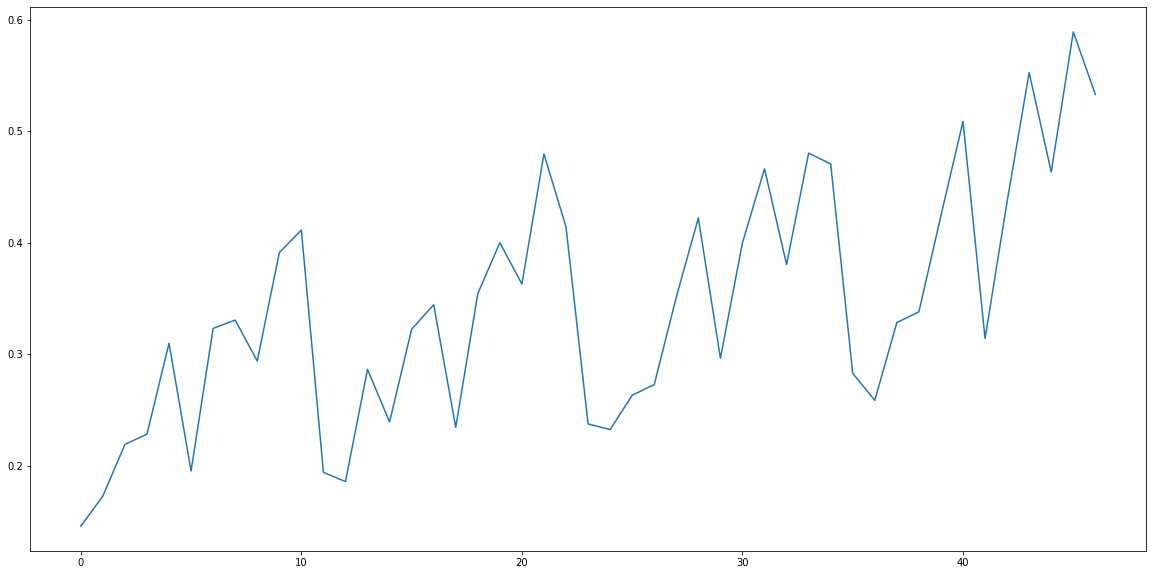

In [75]:
#回購買率(如果該客戶本月購買過，而下個月也有購買，即稱為回購)
def purchase_back(data):
    status=[]
    for i in range(47):
        if data[i] ==1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status

purchase_b = df_purchase.apply(purchase_back,axis =1,result_type='expand')
(purchase_b.sum()/purchase_b.count()).plot(figsize=(20,10))